<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine-learning-for-classification/blob/main/LightGBM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LightGBM**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather_data = pd.read_csv('australia.csv')

In [3]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# **Exploratory Data Analysis**

---



In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
weather_data.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [7]:
print(f"Original number of rows: {len(weather_data)}")
weather_data.dropna(subset=['RainTomorrow'], inplace=True)
print(f"Number of rows after dropping missing target values: {len(weather_data)}")

Original number of rows: 145460
Number of rows after dropping missing target values: 142193


In [8]:
print("\nDistribution of 'RainTomorrow':")
print(weather_data['RainTomorrow'].value_counts(normalize=True))


Distribution of 'RainTomorrow':
RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64


In [9]:
print("\nConverting target variable to numerical format (0 for 'No', 1 for 'Yes')...")
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].map({'No': 0, 'Yes': 1})
print("Conversion complete.")
print("First 5 values of the transformed 'RainTomorrow' column:")
print(weather_data['RainTomorrow'].head())


Converting target variable to numerical format (0 for 'No', 1 for 'Yes')...
Conversion complete.
First 5 values of the transformed 'RainTomorrow' column:
0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64


In [10]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [11]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.224181
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


# **Visualization**

---



Text(0, 0.5, 'Count')

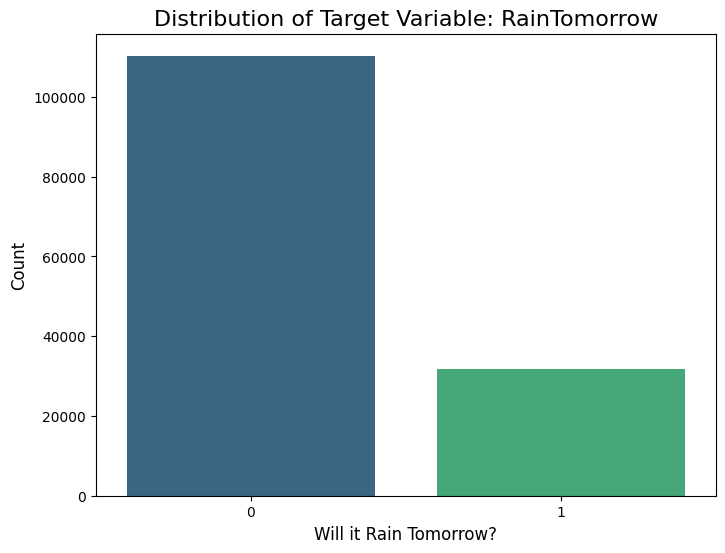

In [12]:
plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.countplot(
    data=weather_data,
    x='RainTomorrow',
    ax=ax,
    palette='viridis'
)
ax.set_title('Distribution of Target Variable: RainTomorrow', fontsize=16)
ax.set_xlabel('Will it Rain Tomorrow?', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

Text(0, 0.5, 'Frequency (Log Scale)')

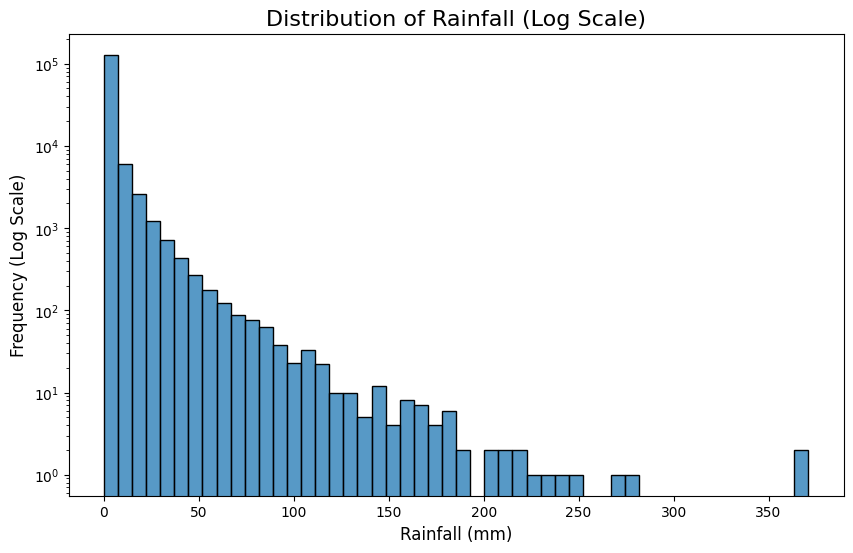

In [13]:
plt.figure(figsize=(10, 6))
ax = plt.gca()


sns.histplot(
    data=weather_data,
    x='Rainfall',
    ax=ax,
    bins=50
)

ax.set_yscale('log')

ax.set_title('Distribution of Rainfall (Log Scale)', fontsize=16)
ax.set_xlabel('Rainfall (mm)', fontsize=12)
ax.set_ylabel('Frequency (Log Scale)', fontsize=12)

In [14]:
px.histogram(weather_data,x='Location',color='RainToday',title='Location vs Raintoday')

Text(0, 0.5, 'Humidity at 3pm (%)')

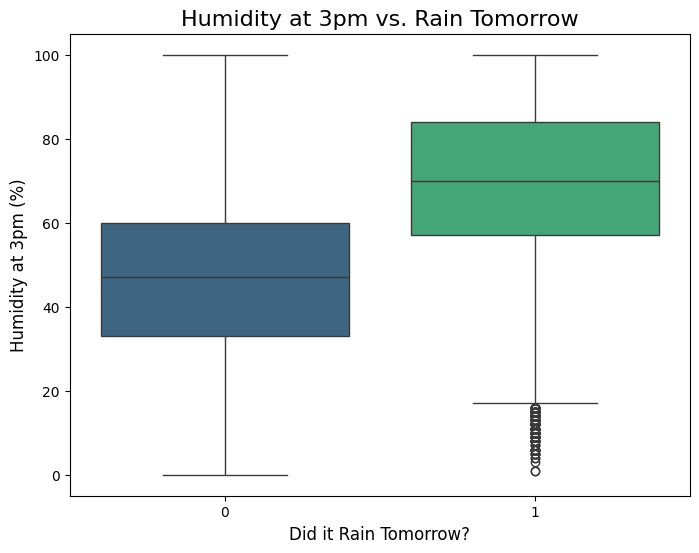

In [15]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=weather_data,
    x='RainTomorrow',
    y='Humidity3pm',
    palette='viridis'
)

plt.title('Humidity at 3pm vs. Rain Tomorrow', fontsize=16)
plt.xlabel('Did it Rain Tomorrow?', fontsize=12)
plt.ylabel('Humidity at 3pm (%)', fontsize=12)

Text(0, 0.5, 'Sunshine (Hours)')

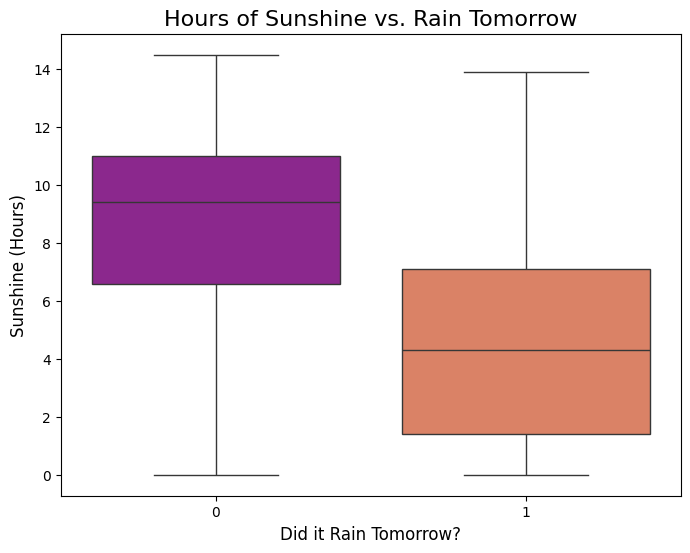

In [16]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=weather_data,
    x='RainTomorrow',
    y='Sunshine',
    palette='plasma'
)

plt.title('Hours of Sunshine vs. Rain Tomorrow', fontsize=16)
plt.xlabel('Did it Rain Tomorrow?', fontsize=12)
plt.ylabel('Sunshine (Hours)', fontsize=12)

Text(0.5, 1.0, 'Correlation Heatmap of All Numerical Features')

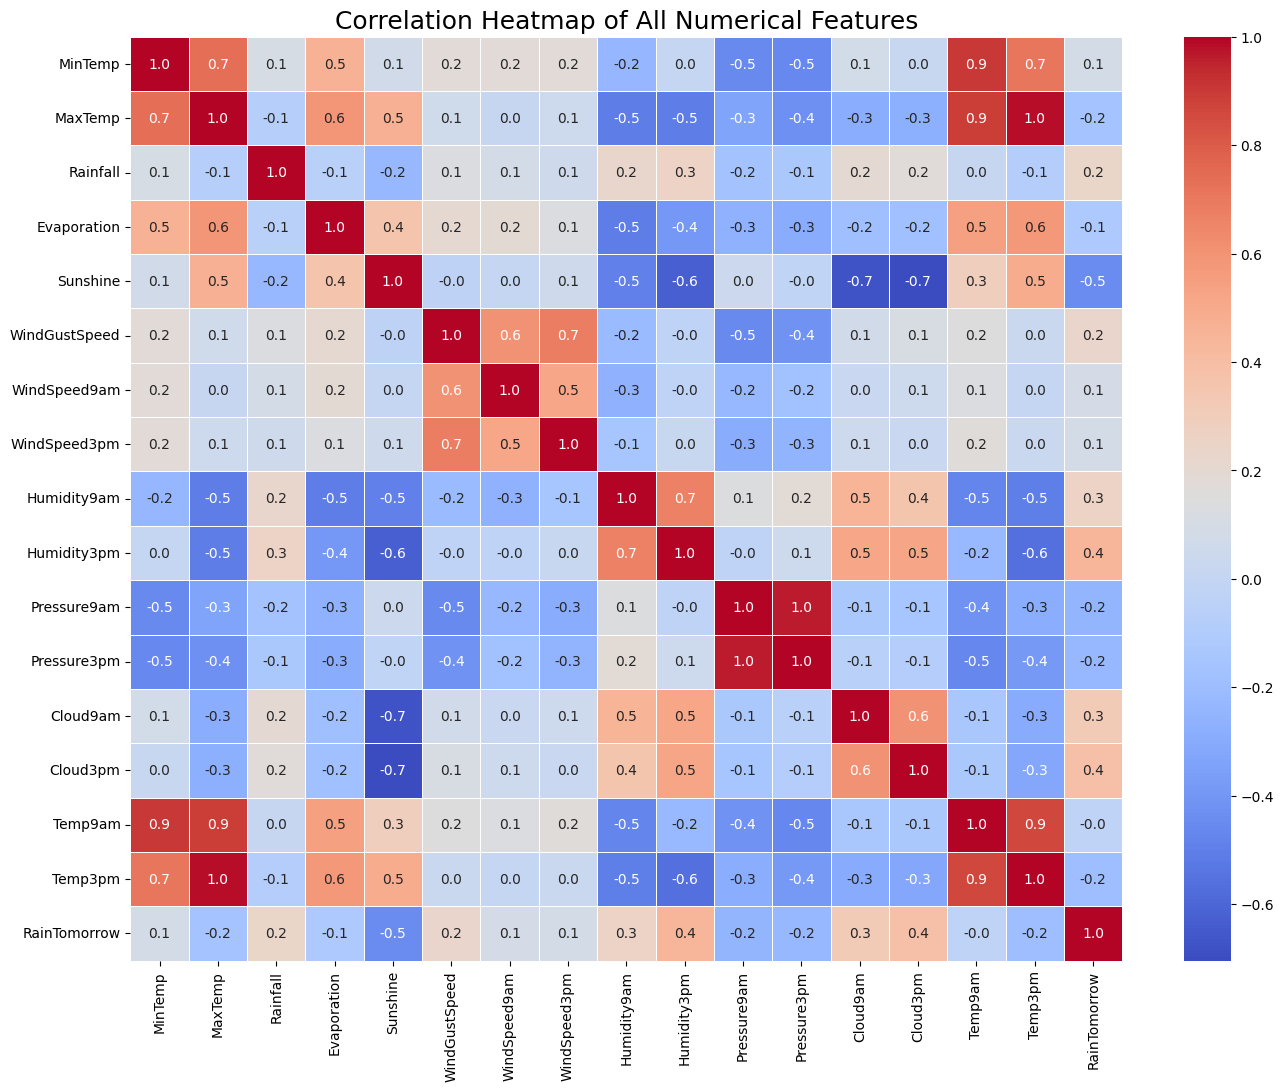

In [17]:
plt.figure(figsize=(16, 12)) # Create a new, separate figure for the large heatmap
correlation_matrix = weather_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Correlation Heatmap of All Numerical Features', fontsize=18)

# **Feature Engineering**

---



In [18]:
# --- Make a copy to avoid changing the original raw data ---
df_eng = weather_data.copy()

# --- 1. Date-Based Features ---
# First, ensure the 'Date' column is in datetime format
df_eng['Date'] = pd.to_datetime(df_eng['Date'])

# Extract year, month, and day
df_eng['Year'] = df_eng['Date'].dt.year
df_eng['Month'] = df_eng['Date'].dt.month
df_eng['Day'] = df_eng['Date'].dt.day

# It's often useful to know the day of the year as well
df_eng['DayOfYear'] = df_eng['Date'].dt.dayofyear

print("Created date-based features: Year, Month, Day, DayOfYear")

Created date-based features: Year, Month, Day, DayOfYear


In [19]:
# Daily temperature range
df_eng['TempRange'] = df_eng['MaxTemp'] - df_eng['MinTemp']

# Average temperature for the day
df_eng['AvgTemp'] = (df_eng['MinTemp'] + df_eng['MaxTemp']) / 2

print("Created temperature-based features: TempRange, AvgTemp")

Created temperature-based features: TempRange, AvgTemp


In [20]:
df_eng['PressureChange'] = df_eng['Pressure3pm'] - df_eng['Pressure9am']

print("Created pressure-based feature: PressureChange")

Created pressure-based feature: PressureChange


In [21]:
df_eng['AvgWindSpeed'] = (df_eng['WindSpeed9am'] + df_eng['WindSpeed3pm']) / 2

print("Created wind-based feature: AvgWindSpeed")

Created wind-based feature: AvgWindSpeed


In [22]:
df_eng['HumidityTemp_Interaction'] = df_eng['AvgTemp'] * (df_eng['Humidity3pm'] * 0.01)

print("Created interaction feature: HumidityTemp_Interaction")

Created interaction feature: HumidityTemp_Interaction


In [23]:
df_eng = df_eng.drop('Date', axis=1)
print("\nDropped the original 'Date' column.")


Dropped the original 'Date' column.


In [24]:
#  --- Display the results ---
print("\n--- DataFrame with New Features (first 5 rows) ---")
display(df_eng.head())

print(f"\nOriginal number of columns: {len(weather_data.columns)}")
print(f"New number of columns: {len(df_eng.columns)}")


--- DataFrame with New Features (first 5 rows) ---


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,2008,12,1,336,9.5,18.15,-0.6,22.0,3.9930
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,2008,12,2,337,17.7,16.25,-2.8,13.0,4.0625
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,2008,12,3,338,12.8,19.30,1.1,22.5,5.7900
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,2008,12,4,339,18.8,18.60,-4.8,10.0,2.9760
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,2008,12,5,340,14.8,24.90,-4.8,13.5,8.2170



Original number of columns: 23
New number of columns: 31


In [25]:
print("\n--- Preparing 'RainToday' Feature ---")
if 'RainToday' in df_eng.columns and df_eng['RainToday'].dtype == 'object':
    df_eng['RainToday'] = df_eng['RainToday'].map({'No': 0, 'Yes': 1})
    print("Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.")

print("\n--- Final DataFrame Info ---")
df_eng.info()


--- Preparing 'RainToday' Feature ---
Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Location                  142193 non-null  object 
 1   MinTemp                   141556 non-null  float64
 2   MaxTemp                   141871 non-null  float64
 3   Rainfall                  140787 non-null  float64
 4   Evaporation               81350 non-null   float64
 5   Sunshine                  74377 non-null   float64
 6   WindGustDir               132863 non-null  object 
 7   WindGustSpeed             132923 non-null  float64
 8   WindDir9am                132180 non-null  object 
 9   WindDir3pm                138415 non-null  object 
 10  WindSpeed9am              140845 non-null  float64
 11  WindS

# **Train Test Split**

---



In [26]:
# --- Splitting the data based on the 'Year' column ---
train_df = df_eng[df_eng.Year < 2015].copy()
val_df = df_eng[df_eng.Year == 2015].copy()
test_df = df_eng[df_eng.Year > 2015].copy()

# --- Verify the Shapes ---
print("--- DataFrame Shapes after Time-Based Splitting ---")
print("Training DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", val_df.shape)
print("Test DataFrame shape:", test_df.shape)

--- DataFrame Shapes after Time-Based Splitting ---
Training DataFrame shape: (98988, 31)
Validation DataFrame shape: (17231, 31)
Test DataFrame shape: (25974, 31)


In [27]:
train_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,2008,12,1,336,9.5,18.15,-0.6,22.0,3.9930
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,2008,12,2,337,17.7,16.25,-2.8,13.0,4.0625
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,2008,12,3,338,12.8,19.30,1.1,22.5,5.7900
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,2008,12,4,339,18.8,18.60,-4.8,10.0,2.9760
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,2008,12,5,340,14.8,24.90,-4.8,13.5,8.2170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,0,2014,12,27,361,16.3,25.05,-4.3,25.0,3.2565
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,0,2014,12,28,362,21.7,25.95,-5.0,19.5,2.0760
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,0,2014,12,29,363,20.5,27.55,-3.9,17.5,2.2040
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,0,2014,12,30,364,18.4,29.30,-4.8,22.5,2.6370


In [28]:
val_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
2133,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,W,...,0,2015,1,1,1,22.1,22.45,-2.5,9.0,3.1430
2134,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,ESE,...,0,2015,1,2,2,24.1,27.55,-3.6,9.0,3.3060
2135,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,N,...,0,2015,1,3,3,21.2,27.70,-5.6,20.0,5.2630
2136,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,W,...,0,2015,1,4,4,7.1,29.55,-1.5,7.0,10.9335
2137,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,SE,...,0,2015,1,5,5,16.2,27.10,-2.7,8.0,9.2140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,E,...,0,2015,12,27,361,14.2,27.60,-3.1,27.5,3.3120
144914,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,ESE,...,0,2015,12,28,362,18.4,27.20,-3.8,30.5,1.9040
144915,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,SE,...,0,2015,12,29,363,19.6,27.30,-5.1,27.5,1.9110
144916,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,SSE,...,0,2015,12,30,364,18.9,29.45,-4.6,18.5,3.5340


In [29]:
test_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
2498,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,ESE,...,0,2016,1,1,1,17.2,29.00,-4.2,3.5,4.9300
2499,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,SE,...,1,2016,1,2,2,12.7,27.25,-2.7,13.0,8.1750
2500,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,ENE,...,1,2016,1,3,3,4.7,20.75,0.8,25.0,13.9025
2501,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,SSE,...,1,2016,1,4,4,6.4,20.50,-1.4,13.0,13.3250
2502,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,SSE,...,0,2016,1,5,5,7.4,19.20,-2.4,7.5,12.0960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,0,2017,6,20,171,18.3,12.65,-3.5,14.0,3.4155
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,0,2017,6,21,172,20.6,13.10,-4.3,12.0,3.1440
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,0,2017,6,22,173,21.7,14.45,-4.4,11.0,3.0345
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,0,2017,6,23,174,21.5,16.15,-4.2,9.0,3.8760


# **Input and Target Columns**

---



In [30]:
target_column = 'RainTomorrow'

# Create Training sets
X_train = train_df.drop(target_column, axis=1)
y_train = train_df[target_column]

In [31]:
# Create Validation sets
X_val = val_df.drop(target_column, axis=1)
y_val = val_df[target_column]

In [32]:
# Create Test sets
X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

In [33]:
# --- Verify the Shapes ---
print("--- Final Dataset Shapes ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print("-" * 30)
print(f"Shape of X_val:   {X_val.shape}")
print(f"Shape of y_val:   {y_val.shape}")
print("-" * 30)
print(f"Shape of X_test:  {X_test.shape}")
print(f"Shape of y_test:  {y_test.shape}")

--- Final Dataset Shapes ---
Shape of X_train: (98988, 30)
Shape of y_train: (98988,)
------------------------------
Shape of X_val:   (17231, 30)
Shape of y_val:   (17231,)
------------------------------
Shape of X_test:  (25974, 30)
Shape of y_test:  (25974,)


# **Pipeline**

---



In [34]:
# --- 1. Imports ---
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier


# --- 2. Define the Preprocessor ---

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Ensure 'RainToday' is treated as categorical if it's currently numerical
if 'RainToday' in numerical_features:
    numerical_features.remove('RainToday')
    categorical_features.append('RainToday')

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop'
)


# --- 3. Create the Final LightGBM Pipeline ---
# This chains our preprocessor with the LGBMClassifier.
# We enable the GPU by setting device='gpu'.
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),

    ('classifier', LGBMClassifier(
        device='gpu',
        random_state=42
    ))
])

# --- 4. Display the Pipeline ---
print("✅ Full LightGBM pipeline created successfully.")
print("\nPipeline Steps:")
display(lgbm_pipeline)

✅ Full LightGBM pipeline created successfully.

Pipeline Steps:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9a...
                                                   'TempRange', 'AvgTemp',
                                                   'PressureChange',
                                                   'AvgWindSpeed',
                                                   'HumidityTemp_Interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday'])])),
                ('classifier', LGBMClassifier(device='gpu', random_state=42))])

# **Evaluation and Selection**

---



In [35]:
print("Training the lgbm pipeline...")
lgbm_pipeline.fit(X_train, y_train)
print("✅ Training complete.")

Training the lgbm pipeline...
[LightGBM] [Info] Number of positive: 22283, number of negative: 76705
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4164
[LightGBM] [Info] Number of data points in the train set: 98988, number of used features: 124
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (3.02 MB) transferred to GPU in 0.005628 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225108 -> initscore=-1.236143
[LightGBM] [Info] Start training from score -1.236143
✅ Training complete.


In [36]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

print("\nMaking predictions on the validation data...")
val_preds = lgbm_pipeline.predict(X_val)
val_preds_proba = lgbm_pipeline.predict_proba(X_val)[:, 1] # Get probabilities for AUC-ROC

print("\n--- Baseline LightGBM Evaluation ---")
f1 = f1_score(y_val, val_preds)
roc_auc = roc_auc_score(y_val, val_preds_proba)
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC:  {roc_auc:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_val, val_preds))


Making predictions on the validation data...

--- Baseline LightGBM Evaluation ---
F1-Score: 0.5921
AUC-ROC:  0.8895

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13583
           1       0.76      0.49      0.59      3648

    accuracy                           0.86     17231
   macro avg       0.82      0.72      0.75     17231
weighted avg       0.85      0.86      0.85     17231



# **Helper Function**

---



In [46]:
def lgbm_hyperparameter(param_name, param_value):

    params = {param_name: param_value}

    lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42,device='gpu',verbose=-1,**params))
])

    # Train the pipeline
    lgbm_pipeline.fit(X_train, y_train)

    train_preds = lgbm_pipeline.predict(X_train)
    train_f1 = f1_score(y_train, train_preds)

    # --- Validation Metrics ---
    val_preds = lgbm_pipeline.predict(X_val)
    val_f1 = f1_score(y_val, val_preds)

    # Return a dictionary with the F1 Error for both sets.
    return {
         param_name: param_value,
        'train_f1_error': round(1 - train_f1, 4),
        'validation_f1_error': round(1 - val_f1, 4)
    }

# **Hypereparameter Tuning**

---



# **n_estimators**

---



In [47]:
n_estimators_df = pd.DataFrame(lgbm_hyperparameter('n_estimators',n) for n in [1, 10, 50, 100, 200, 300, 500, 800, 1000])

display(n_estimators_df)

,n_estimators,train_f1_error,validation_f1_error
0,1,1.0000,1.0000
1,10,0.5159,0.5602
2,50,0.3564,0.4184
3,100,0.3327,0.4079
4,200,0.3028,0.4007
5,300,0.2752,0.3947
6,500,0.2301,0.3892
7,800,0.1698,0.3879
8,1000,0.1367,0.3857


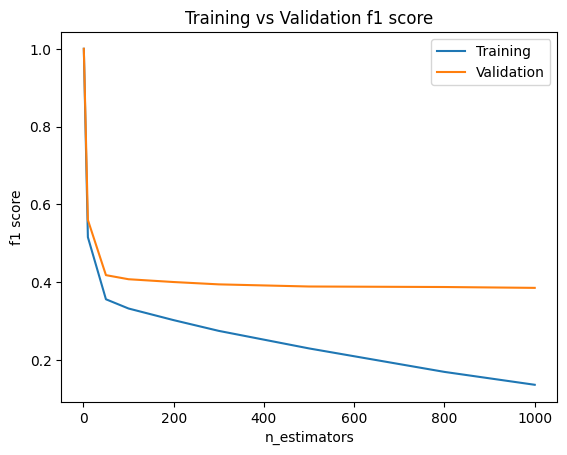

In [48]:
plt.figure()
plt.plot(n_estimators_df['n_estimators'],n_estimators_df['train_f1_error'])
plt.plot(n_estimators_df['n_estimators'],n_estimators_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('n_estimators')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **learning_rate**

---



In [49]:
learning_rate_df = pd.DataFrame(lgbm_hyperparameter('learning_rate',lr)for lr in [0.001,0.005,0.01,0.1,0.2,0.3,0.4,0.5,1.0])

display(learning_rate_df)

,learning_rate,train_f1_error,validation_f1_error
0,0.001,1.0000,1.0000
1,0.005,1.0000,1.0000
2,0.010,0.5323,0.5753
3,0.100,0.3327,0.4079
4,0.200,0.3017,0.3998
5,0.300,0.2765,0.3991
6,0.400,0.2527,0.3949
7,0.500,0.2372,0.4026
8,1.000,0.3029,0.4182


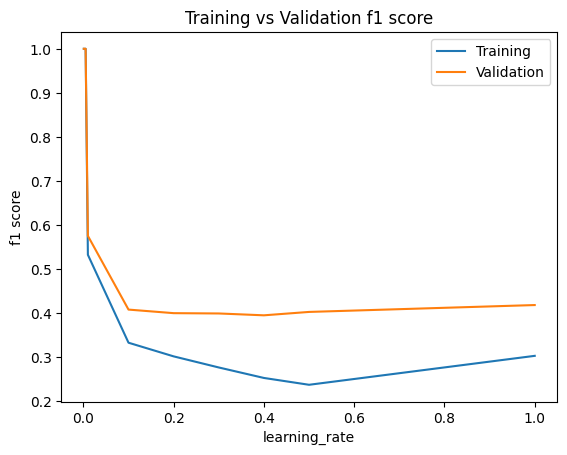

In [50]:
plt.figure()
plt.plot(learning_rate_df['learning_rate'],learning_rate_df['train_f1_error'])
plt.plot(learning_rate_df['learning_rate'],learning_rate_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('learning_rate')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **num_leaves**

---



In [51]:
num_leaves_df = pd.DataFrame(lgbm_hyperparameter('num_leaves',nl)for nl in [2, 3, 4, 5, 10, 15, 20, 31])

display(num_leaves_df)

,num_leaves,train_f1_error,validation_f1_error
0,2,0.4420,0.4854
1,3,0.4121,0.4603
2,4,0.3983,0.4469
3,5,0.3885,0.4367
4,10,0.3675,0.4238
5,15,0.3567,0.4144
6,20,0.3468,0.4110
7,31,0.3327,0.4079


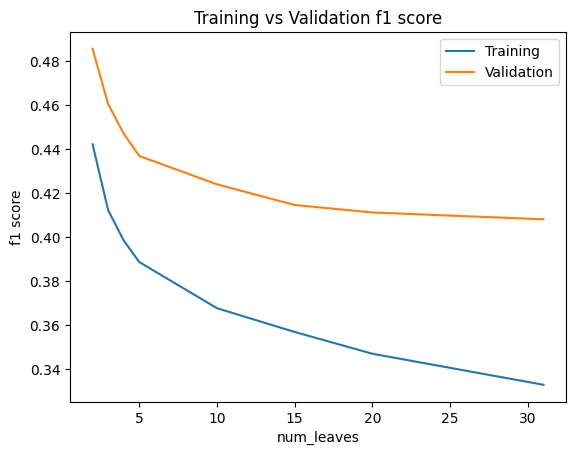

In [52]:
plt.figure()
plt.plot(num_leaves_df['num_leaves'],num_leaves_df['train_f1_error'])
plt.plot(num_leaves_df['num_leaves'],num_leaves_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('num_leaves')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **max_depth**

---



In [53]:
max_depth_df = pd.DataFrame(lgbm_hyperparameter('max_depth',d)for d in range(1,11))

display(max_depth_df)

,max_depth,train_f1_error,validation_f1_error
0,1,0.4420,0.4854
1,2,0.4054,0.4543
2,3,0.3844,0.4374
3,4,0.3677,0.4244
4,5,0.3500,0.4139
5,6,0.3396,0.4054
6,7,0.3343,0.4085
7,8,0.3339,0.4021
8,9,0.3324,0.4093
9,10,0.3313,0.4029


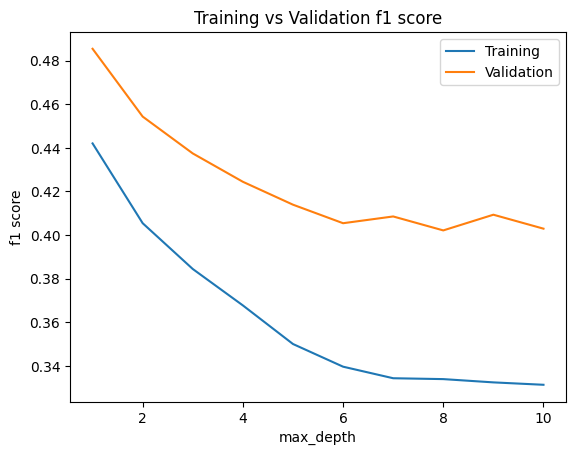

In [54]:
plt.figure()
plt.plot(max_depth_df['max_depth'],max_depth_df['train_f1_error'])
plt.plot(max_depth_df['max_depth'],max_depth_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **subsample**

---



In [55]:
subsample_df = pd.DataFrame(lgbm_hyperparameter('subsample',s) for s in [0.6,0.7,0.8,0.9,1.0])

display(subsample_df)

,subsample,train_f1_error,validation_f1_error
0,0.6,0.3327,0.4079
1,0.7,0.3327,0.4079
2,0.8,0.3327,0.4079
3,0.9,0.3327,0.4079
4,1.0,0.3327,0.4079


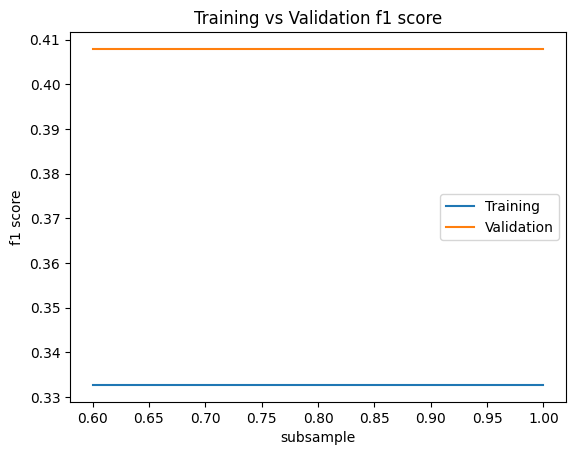

In [56]:
plt.figure()
plt.plot(subsample_df['subsample'],subsample_df['train_f1_error'])
plt.plot(subsample_df['subsample'],subsample_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('subsample')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **colsample_bytree**

---



In [57]:
colsample_bytree_df = pd.DataFrame(lgbm_hyperparameter('colsample_bytree',cbt) for cbt in [0.6,0.7,0.8,0.9,1.0])

display(colsample_bytree_df)

,colsample_bytree,train_f1_error,validation_f1_error
0,0.6,0.3346,0.4009
1,0.7,0.3336,0.3973
2,0.8,0.3322,0.4001
3,0.9,0.3309,0.4018
4,1.0,0.3327,0.4079


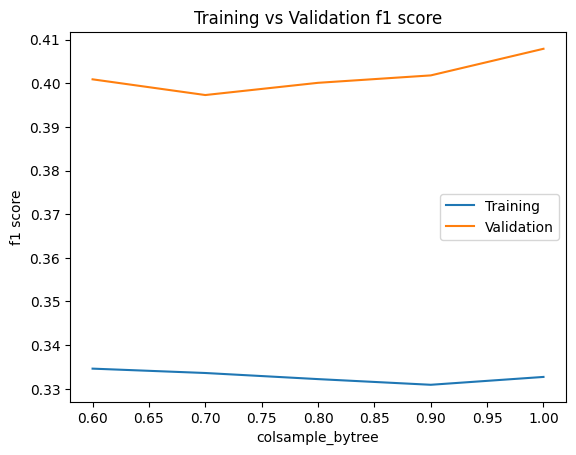

In [58]:
plt.figure()
plt.plot(colsample_bytree_df['colsample_bytree'],colsample_bytree_df['train_f1_error'])
plt.plot(colsample_bytree_df['colsample_bytree'],colsample_bytree_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('colsample_bytree')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **reg_alpha**

---



In [59]:
reg_alpha_df = pd.DataFrame(lgbm_hyperparameter('reg_alpha',ra)for ra in [0.001,0.005,0.1,0.2,0.5,1.0,2.0])

display(reg_alpha_df)

,reg_alpha,train_f1_error,validation_f1_error
0,0.001,0.3319,0.4067
1,0.005,0.3315,0.4073
2,0.100,0.3314,0.4016
3,0.200,0.3315,0.4040
4,0.500,0.3314,0.4017
5,1.000,0.3315,0.4060
6,2.000,0.3316,0.4018


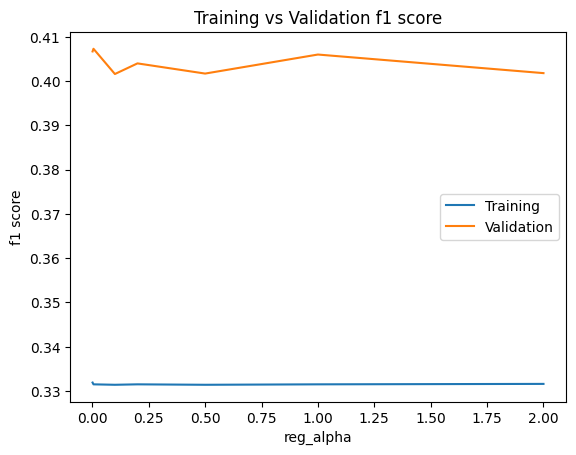

In [60]:
plt.figure()
plt.plot(reg_alpha_df['reg_alpha'],reg_alpha_df['train_f1_error'])
plt.plot(reg_alpha_df['reg_alpha'],reg_alpha_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('reg_alpha')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **reg_lambda**

---



In [61]:
reg_lambda_df = pd.DataFrame(lgbm_hyperparameter('reg_lambda',rl)for rl in [0.001,0.005,0.1,0.5,1.0,2.0])

display(reg_lambda_df)

,reg_lambda,train_f1_error,validation_f1_error
0,0.001,0.3327,0.4079
1,0.005,0.3325,0.4101
2,0.100,0.3315,0.4074
3,0.500,0.3297,0.4020
4,1.000,0.3310,0.3978
5,2.000,0.3314,0.4027


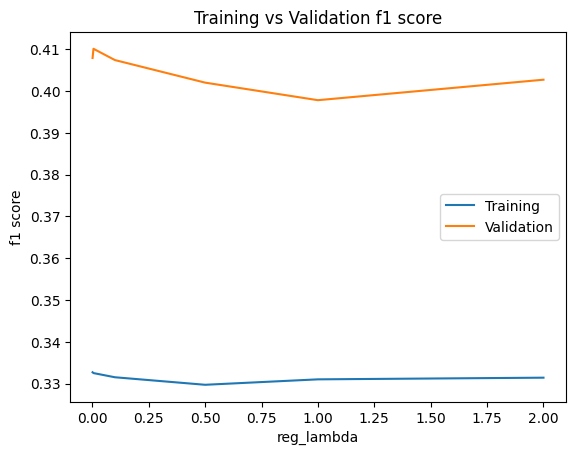

In [62]:
plt.figure()
plt.plot(reg_lambda_df['reg_lambda'],reg_lambda_df['train_f1_error'])
plt.plot(reg_lambda_df['reg_lambda'],reg_lambda_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('reg_lambda')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **RandomizedSearch CV**

---



In [64]:
# --- 1. Imports ---
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


# --- 2. Define the Targeted Hyperparameter Search Space ---

param_dist = {
    # We are targeting the 'classifier' step in our pipeline.
    'classifier__n_estimators': randint(low=400, high=800),
    'classifier__learning_rate': uniform(loc=0.1, scale=0.4), # Search from 0.1 up to 0.5
    'classifier__num_leaves': randint(low=31, high=70),
    'classifier__max_depth': randint(low=7, high=12),

    # For subsampling, we MUST include bagging_freq > 0
    'classifier__subsample': uniform(loc=0.6, scale=0.4), # Search from 0.6 up to 1.0
    'classifier__bagging_freq': [1], # This activates subsampling

    'classifier__colsample_bytree': uniform(loc=0.6, scale=0.4), # Search from 0.6 up to 1.0
    'classifier__reg_alpha': uniform(loc=0.0, scale=1.0), # Search from 0.0 up to 1.0
    'classifier__reg_lambda': uniform(loc=0.0, scale=2.0) # Search from 0.0 up to 2.0
}


# --- 3. Set up RandomizedSearchCV ---
# The 'f1' score will be our guide to find the best model.
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=2,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1 # Set to 0 for silent execution
)


# --- 4. Run the Search ---
print("--- 🚀 Starting Final RandomizedSearchCV for LightGBM (on GPU) 🚀 ---")
# IMPORTANT: Use the dataframe with the correct 'category' dtype
random_search_lgbm.fit(X_train, y_train)


# --- 5. Report the Best Results ---
print("\n✅ RandomizedSearchCV Complete.")
print(f"\nBest average F1-Score during cross-validation: {random_search_lgbm.best_score_:.4f}")
print("\n🏆 Best Hyperparameters Found:")
print(random_search_lgbm.best_params_)

--- 🚀 Starting Final RandomizedSearchCV for LightGBM (on GPU) 🚀 ---
Fitting 2 folds for each of 20 candidates, totalling 40 fits

✅ RandomizedSearchCV Complete.

Best average F1-Score during cross-validation: 0.5786

🏆 Best Hyperparameters Found:
{'classifier__bagging_freq': 1, 'classifier__colsample_bytree': np.float64(0.908897907718663), 'classifier__learning_rate': np.float64(0.17948627261366898), 'classifier__max_depth': 9, 'classifier__n_estimators': 480, 'classifier__num_leaves': 38, 'classifier__reg_alpha': np.float64(0.7290071680409873), 'classifier__reg_lambda': np.float64(1.5425406933718915), 'classifier__subsample': np.float64(0.6296178606936361)}


# **Evaluation**

---



In [67]:
# --- 1. Imports ---
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
import plotly.figure_factory as ff
import warnings

# Suppress the LightGBM warnings for a clean output
warnings.filterwarnings("ignore", category=UserWarning)


# --- 2. Re-create the Baseline Pipeline ---
# We create it again here to ensure we are evaluating the correct model.
lgbm_baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Using the memory-efficient preprocessor
    ('classifier', LGBMClassifier(
        device='gpu',
        random_state=42,
        verbosity=-1 # Suppress warnings
    ))
])


# --- 3. Fit the Baseline Pipeline ---
print("Fitting the champion (baseline) LightGBM model...")
# Use the dataframe with the correct 'category' dtype
lgbm_baseline_pipeline.fit(X_train, y_train)
print("✅ Fitting complete.")


# --- 4. Make Predictions on the Validation Set ---
print("\nMaking predictions on the unseen validation data...")
# Use the validation dataframe with the correct 'category' dtype
val_preds = lgbm_baseline_pipeline.predict(X_val)
val_preds_proba = lgbm_baseline_pipeline.predict_proba(X_val)[:, 1]


# --- 5. Calculate and Print the Official Scores ---
final_f1_score = f1_score(y_val, val_preds)
final_auc_score = roc_auc_score(y_val, val_preds_proba)

print("\n--- 🏆 Official Gauntlet Score for LightGBM 🏆 ---")
print(f"Validation F1-Score: {final_f1_score:.4f}")
print(f"Validation AUC-ROC:  {final_auc_score:.4f}")
print("----------------------------------------------------")


# --- 6. Display the Full Classification Report and Confusion Matrix ---
print("\n--- Full Classification Report ---")
report = classification_report(y_val, val_preds, target_names=['No Rain', 'Rain'])
print(report)

print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_val, val_preds)
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=['Predicted No Rain', 'Predicted Rain'],
    y=['Actual No Rain', 'Actual Rain'],
    colorscale='Blues',
    showscale=True
)
fig.update_layout(title_text='Confusion Matrix (Champion LightGBM)')
fig.show()


Fitting the champion (baseline) LightGBM model...
✅ Fitting complete.

Making predictions on the unseen validation data...

--- 🏆 Official Gauntlet Score for LightGBM 🏆 ---
Validation F1-Score: 0.5921
Validation AUC-ROC:  0.8895
----------------------------------------------------

--- Full Classification Report ---
              precision    recall  f1-score   support

     No Rain       0.87      0.96      0.91     13583
        Rain       0.76      0.49      0.59      3648

    accuracy                           0.86     17231
   macro avg       0.82      0.72      0.75     17231
weighted avg       0.85      0.86      0.85     17231


--- Confusion Matrix ---


# **Feature Importance**

---



In [68]:
from sklearn.inspection import permutation_importance

perm_importance_df = pd.DataFrame({
    'Feature': X_val.columns,
    'Importance': permutation_importance(lgbm_baseline_pipeline, X_val, y_val, scoring='f1', n_repeats=5, random_state=42).importances_mean
}).sort_values(by='Importance', ascending=False)

display(perm_importance_df.head(10))

,Feature,Importance
13,Humidity3pm,0.232049
7,WindGustSpeed,0.051220
5,Sunshine,0.032205
15,Pressure3pm,0.026949
3,Rainfall,0.026693
17,Cloud3pm,0.023837
29,HumidityTemp_Interaction,0.021819
0,Location,0.015615
25,TempRange,0.006328
9,WindDir3pm,0.002490


<Axes: title={'center': 'Feature_Importance'}, xlabel='Importance', ylabel='Feature'>

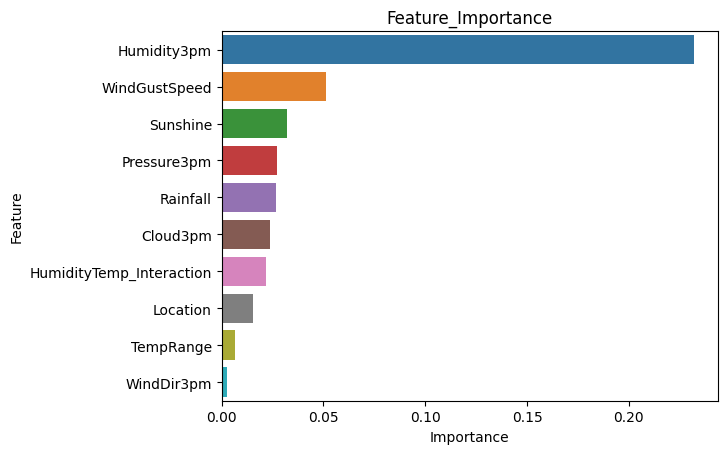

In [69]:
plt.title('Feature_Importance')
sns.barplot(data=perm_importance_df.head(10),x='Importance',y='Feature',hue='Feature')

# **Saving through Joblib**

---



In [70]:
import joblib

model_filename = '08_lightgbm_champion.joblib'

joblib.dump(lgbm_baseline_pipeline, model_filename)

print(f"✅ Champion LightGBM model successfully saved to the temporary session storage as '{model_filename}'.")

✅ Champion LightGBM model successfully saved to the temporary session storage as '08_lightgbm_champion.joblib'.


In [71]:
# --- 1. Imports ---
import joblib
from google.colab import drive

# --- 2. Mount Google Drive ---

print("Connecting to Google Drive...")
drive.mount('/content/drive')


# --- 3. Define File Path and Save the Model ---
# We will save the model in the main 'My Drive' directory.
drive_path = '/content/drive/My Drive/'
model_filename = '08_lightgbm_champion.joblib'
full_path = drive_path + model_filename


print(f"\nSaving the Champion LightGBM model to your Google Drive at: {full_path}")
joblib.dump(lgbm_baseline_pipeline, full_path)


print(f"\n✅ Success! Your champion LightGBM model is now permanently saved.")

Connecting to Google Drive...
Mounted at /content/drive

Saving the Champion LightGBM model to your Google Drive at: /content/drive/My Drive/08_lightgbm_champion.joblib

✅ Success! Your champion LightGBM model is now permanently saved.


# **Deployment**

---



In [72]:
# --- 1. Imports ---
import gradio as gr
import joblib
import pandas as pd
import numpy as np
import warnings

# Suppress warnings for a cleaner interface
warnings.filterwarnings("ignore", category=UserWarning)


# --- 2. Load the Trained Model Pipeline ---
# This is the ONLY file we need.
MODEL_FILENAME = '08_lightgbm_champion.joblib'

try:
    model_pipeline = joblib.load(MODEL_FILENAME)
    print(f"✅ Champion Model '{MODEL_FILENAME}' loaded successfully.")
except FileNotFoundError:
    print(f"❌ FATAL ERROR: Model file '{MODEL_FILENAME}' not found.")
    print("--- Please ensure you have run the 'joblib.dump()' cell first. ---")
    # exit() # Uncomment this line if running as a .py script


# --- 3. Define All Necessary Data for the Prediction Function ---
# This data is hard-coded to ensure the app is self-contained.

# The exact list of unique locations from the training data.
AUSTRALIA_LOCATIONS = [
    'Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle',
    'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
    'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong',
    'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',

    'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
    'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
    'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums',
    'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru'
]

# The exact list of 30 input columns the model pipeline expects.
MODEL_INPUT_COLUMNS = [
    'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
    'Day', 'DayOfYear', 'TempRange', 'AvgTemp', 'PressureChange', 'AvgWindSpeed',
    'HumidityTemp_Interaction'
]


# --- 4. Define the Master Prediction Function ---
# This function takes user inputs, builds a DataFrame, and returns predictions.
def predict_rainfall(location, min_temp, max_temp, rainfall, wind_gust_speed, humidity_3pm, pressure_3pm, rain_today):
    """
    Takes user inputs, creates a pandas DataFrame in the exact format the model
    was trained on, and returns the model's prediction probabilities.
    """
    # Create a dictionary with all columns, initially filled with NaNs
    input_data = {col: np.nan for col in MODEL_INPUT_COLUMNS}

    # Update the dictionary with the user's inputs
    input_data.update({
        'Location': location,
        'MinTemp': min_temp,
        'MaxTemp': max_temp,
        'Rainfall': rainfall,
        'WindGustSpeed': wind_gust_speed,
        'Humidity3pm': humidity_3pm,
        'Pressure3pm': pressure_3pm,
        'RainToday': 1 if rain_today == 'Yes' else 0
    })

    # Create a single-row pandas DataFrame
    input_df = pd.DataFrame([input_data])[MODEL_INPUT_COLUMNS]

    # IMPORTANT: Convert categorical columns to 'category' dtype for LightGBM
    categorical_features_names = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
    for col in categorical_features_names:
        # Ensure the column exists before trying to convert
        if col in input_df.columns:
            input_df[col] = input_df[col].astype('category')

    # Use the loaded pipeline to get prediction probabilities
    prediction_proba = model_pipeline.predict_proba(input_df)[0]

    # Format the output for Gradio's Label component
    confidences = {'No Rain Tomorrow': prediction_proba[0], 'Rain Tomorrow': prediction_proba[1]}
    return confidences


# --- 5. Define and Launch the Gradio Interface ---
app_interface = gr.Interface(
    fn=predict_rainfall,
    title="🥈 Australian Rain Predictor (LightGBM Model) 🥈",
    description="Enter today's weather conditions to predict the probability of rain tomorrow. This model is the runner-up, with an F1-Score of 0.5921 and an AUC of 0.8895.",
    inputs=[
        gr.Dropdown(choices=AUSTRALIA_LOCATIONS, label="Location", value="Canberra"),
        gr.Number(label="Min Temperature Today (°C)", value=12.0),
        gr.Number(label="Max Temperature Today (°C)", value=23.0),
        gr.Number(label="Rainfall Today (mm)", value=0.0),
        gr.Number(label="Max Wind Gust Speed (km/h)", value=40.0),
        gr.Number(label="Humidity at 3pm (%)", value=52.0),
        gr.Number(label="Pressure at 3pm (hPa)", value=1015.0),
        gr.Radio(choices=['No', 'Yes'], label="Did it Rain Today?", value='No')
    ],
    outputs=gr.Label(num_top_classes=2, label="Prediction"),
    allow_flagging='never'
)

# Launch the app!
app_interface.launch(share=True, debug=True)


✅ Champion Model '08_lightgbm_champion.joblib' loaded successfully.
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://531894a6ae99a8ec0d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://531894a6ae99a8ec0d.gradio.live
